#### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import os
os.listdir("data")

['bank marketing.csv',
 'cleaned_bank_marketing.csv',
 'cleaned_GB_videos.csv',
 'cleaned_housing_price.csv',
 'GBvideos.csv',
 'housing_price_data.csv']

#### Import Data

#### Banking Data

In [2]:
bank = pd.read_csv("data/cleaned_bank_marketing.csv", sep = ",", engine='python')

# Change target variable to categorical
bank['y'] = bank['y'].astype('category')

bank.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue.collar,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,no
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,no
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,no
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,1,0,...,0,0,1,0,0,0,0,1,0,no
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,0,0,1,0,0,0,0,1,0,no


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            3030 non-null   int64   
 1   campaign                       3030 non-null   int64   
 2   previous                       3030 non-null   int64   
 3   emp.var.rate                   3030 non-null   float64 
 4   cons.price.idx                 3030 non-null   float64 
 5   cons.conf.idx                  3030 non-null   float64 
 6   euribor3m                      3030 non-null   float64 
 7   nr.employed                    3030 non-null   float64 
 8   job_admin.                     3030 non-null   int64   
 9   job_blue.collar                3030 non-null   int64   
 10  job_entrepreneur               3030 non-null   int64   
 11  job_housemaid                  3030 non-null   int64   
 12  job_management                 303

> The goal is to predict if a customer subscribes to a term deposit or not (classification)

#### Video Data

In [4]:
### GB Videos
gb_vid = pd.read_csv("data/cleaned_GB_videos.csv")
#overview
gb_vid.head()

,category_id,views,likes,dislikes,comment_count,ratings_disabled_True,video_error_or_removed_False,video_error_or_removed_True
0,26,0.069072,-0.225219,0.051743,-0.071034,0,1,0
1,24,-0.255499,-0.311320,-0.104059,-0.203619,0,1,0
2,10,0.591575,1.866534,0.701614,2.224907,0,1,0
3,17,-0.309453,-0.383837,-0.148764,-0.257269,0,1,0
4,25,-0.310401,-0.384303,-0.148960,-0.257407,0,1,0


In [5]:
gb_vid.columns

Index(['category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'ratings_disabled_True', 'video_error_or_removed_False',
       'video_error_or_removed_True'],
      dtype='object')

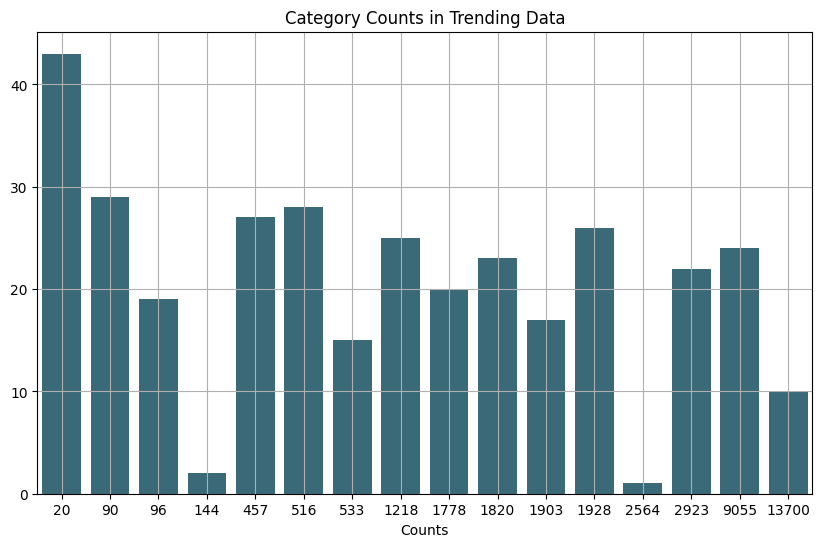

In [6]:
category_counts = pd.DataFrame(gb_vid["category_id"].value_counts(sort=True)).reset_index()
plt.figure(figsize = (10, 6))
# Barplot
sns.barplot(
    y=category_counts["category_id"].to_numpy(),
    x=category_counts["count"].to_numpy(),
    color="#306e81",
)
plt.title("Category Counts in Trending Data")
plt.xlabel("Counts")
plt.grid()
plt.show()

> The goal is to predict the number of likes a video will get

In [7]:
##count missing
gb_vid.isna().sum()

category_id                     0
views                           0
likes                           0
dislikes                        0
comment_count                   0
ratings_disabled_True           0
video_error_or_removed_False    0
video_error_or_removed_True     0
dtype: int64

#### Housing Data

In [8]:
house = pd.read_csv("data/cleaned_housing_price.csv")

In [9]:
house.head()

,block,lot,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,sale_price,...,borough_Queens,borough_Staten Island,tax_class_at_present_1,tax_class_at_present_1A,tax_class_at_present_1C,tax_class_at_present_2,tax_class_at_present_2A,tax_class_at_present_2B,tax_class_at_present_2C,tax_class_at_present_4
0,12204,137,1,0,1,-0.478719,-0.128724,1920,1,380000.0,...,1,0,1,0,0,0,0,0,0,0
1,7470,1405,0,0,0,-1.008535,-0.136345,1980,2,263640.0,...,0,0,0,0,0,1,0,0,0,0
2,3543,1054,0,0,0,-1.008535,-0.122323,1986,2,330000.0,...,0,1,0,0,0,1,0,0,0,0
3,903,1017,0,0,0,-1.008535,-0.113280,1920,2,1050000.0,...,0,0,0,0,0,1,0,0,0,0
4,2750,1204,0,0,0,-1.008535,-0.136751,2018,2,711757.0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
#check missing
house.isna().sum()

block                        0
lot                          0
residential_units            0
commercial_units             0
total_units                  0
land_square_feet             0
gross_square_feet            0
year_built                   0
tax_class_at_time_of_sale    0
sale_price                   0
borough_Manhattan            0
borough_Queens               0
borough_Staten Island        0
tax_class_at_present_1       0
tax_class_at_present_1A      0
tax_class_at_present_1C      0
tax_class_at_present_2       0
tax_class_at_present_2A      0
tax_class_at_present_2B      0
tax_class_at_present_2C      0
tax_class_at_present_4       0
dtype: int64

> Goal is to predict the price of a house (regression)

In [11]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   block                      6736 non-null   int64  
 1   lot                        6736 non-null   int64  
 2   residential_units          6736 non-null   int64  
 3   commercial_units           6736 non-null   int64  
 4   total_units                6736 non-null   int64  
 5   land_square_feet           6736 non-null   float64
 6   gross_square_feet          6736 non-null   float64
 7   year_built                 6736 non-null   int64  
 8   tax_class_at_time_of_sale  6736 non-null   int64  
 9   sale_price                 6736 non-null   float64
 10  borough_Manhattan          6736 non-null   int64  
 11  borough_Queens             6736 non-null   int64  
 12  borough_Staten Island      6736 non-null   int64  
 13  tax_class_at_present_1     6736 non-null   int64

#### Banking Data

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bank.drop(columns='y'), bank['y'], test_size=0.3, random_state=42)

##### Decision Tree

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [14]:
dt_pred = dt.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       467
         yes       1.00      1.00      1.00       442

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909



In [15]:
f1_score(y_test, dt_pred, average='weighted')

1.0

##### Random Forest

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [17]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       467
         yes       1.00      1.00      1.00       442

    accuracy                           1.00       909
   macro avg       1.00      1.00      1.00       909
weighted avg       1.00      1.00      1.00       909



In [18]:
f1_score(y_test, rf_pred, average='weighted')

1.0

#### Housing Data (Regression)

> The objective is to predict the price of a house based on different features

In [19]:
#function to compute all metrics
def evaluate_regression(y_true, y_pred):
    r_squared = round(r2_score(y_true, y_pred), 4)
    rmse = round(mean_squared_error(y_true, y_pred, squared=False), 4)
    mse = round(mean_squared_error(y_true, y_pred), 4)
    mae = round(mean_absolute_error(y_true, y_pred), 4)
    print("R-Squared:", r_squared)
    print("\nRMSE", rmse)
    print("\nMSE:", mse)
    print("\nMAE:", mae)
    return r_squared, rmse, mse, mae

##### Decision Tree

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(house.drop(columns='sale_price'), house['sale_price'], test_size=0.3, random_state=42)

In [21]:
dt_house = DecisionTreeRegressor(random_state=42)
dt_house.fit(X_train, y_train)
dt_pred = dt_house.predict(X_test)
evaluate_regression(y_test, dt_pred)

R-Squared: 0.2233

RMSE 399402.1292

MSE: 159522060787.4953

MAE: 267704.574


(0.2233, 399402.1292, 159522060787.4953, 267704.574)

##### Random Forest

In [22]:
rf_house = RandomForestRegressor(random_state=42)
rf_house.fit(X_train, y_train)
rf_pred = rf_house.predict(X_test)
evaluate_regression(y_test, rf_pred)

R-Squared: 0.6112

RMSE 282587.1721

MSE: 79855509839.4884

MAE: 191127.664


(0.6112, 282587.1721, 79855509839.4884, 191127.664)

#### Video Data (Regression)

> The objective is to predict the number of likes a video will get

##### Decision Tree

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(gb_vid.drop(columns='likes'), gb_vid['likes'], test_size=0.3, random_state=42)

In [24]:
dt_video = DecisionTreeRegressor(random_state=42)
dt_video.fit(X_train, y_train)
dt_pred = dt_video.predict(X_test)
evaluate_regression(y_test, dt_pred)

R-Squared: 0.9626

RMSE 0.1996

MSE: 0.0399

MAE: 0.0419


(0.9626, 0.1996, 0.0399, 0.0419)

##### Random Forest

In [25]:
rf_video = RandomForestRegressor(random_state=42)
rf_video.fit(X_train, y_train)
rf_pred = rf_video.predict(X_test)
evaluate_regression(y_test, rf_pred)

R-Squared: 0.9756

RMSE 0.1613

MSE: 0.026

MAE: 0.0397


(0.9756, 0.1613, 0.026, 0.0397)